# Setup

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import pingouin as pg
from pingouin import pairwise_gameshowell

# File import

In [2]:
cleavage = pd.read_excel('../Cleavage positions.xlsx', sheet_name = 'Cas12a_crRNA3', skiprows = 1).replace('None', np.nan)
no_log = cleavage.loc[:, :'sequence'].join(cleavage.loc[:, 'L_12s':])
cleavage_rate = cleavage.loc[:, :'sequence'].join(cleavage.loc[:, 'cleavage_rate_log':'cleavage_rate_log_unc'])
gRNA = pd.read_csv('gRNA_distances.csv')
Target = pd.read_csv('target_distances.csv')

C:\Users\justa\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


FileNotFoundError: [Errno 2] No such file or directory: 'gRNA_distances.csv'

# Features of the main sequence

In [3]:
OG_seq = cleavage[cleavage['sequence'] == pam_cas12 + sequence + pam_cas9]
OG_seq

NameError: name 'pam_cas12' is not defined

# Creating Filters

In [4]:
#All possible single mismatches
def create_del(sequence, pam_5_end='', pam_3_end=''):
    # When given a sequence, will generate all possible single and double mismatches
    # Can also add two PAMs on different ends
    mis_list = []
    
    # Single mismatches
    for i in range(len(sequence)):
        new_seq = pam_5_end + sequence[:i] + sequence[i+1:] + pam_3_end
        #adds the base into a defined sequence, skipping the place where it gets added, that way simulating a mismatch
        mis_list.append(new_seq)

    return mis_list

def create_mismatches(sequence, pam_5_end='', pam_3_end=''):
    # When given a sequence, will generate all possible single and double mismatches
    # Can also add two PAMs on different ends
    mis_list = []
    
    # Single mismatches
    for i in range(len(sequence)):
        for base in 'ACGT':
            new_seq = pam_5_end + sequence[:i] + base + sequence[i+1:] + pam_3_end
            #adds the base into a defined sequence, skipping the place where it gets added, that way simulating a mismatch
            mis_list.append(new_seq)

            # Double mismatches
            #for j in range(i+1, len(sequence)):
             #   for base2 in 'ACGT':
              #      new_seq2 = pam_5_end + sequence[:i] + base + sequence[i+1:j] + base2 + sequence[j+1:] + pam_3_end
               #     mis_list.append(new_seq2)
                    
                    # Triple mismatches
                    #for f in range(i+2, len(sequence)):
                        #for base3 in 'ACGT':
                            #new_seq3 = pam_5_end + sequence[:i] + base + sequence[i+1:j] + base2 + sequence[j+1:f] + base3 + sequence[f:] + pam_3_end
                            #mis_list.append(new_seq3)
    return mis_list

dels = create_del(sequence, 'TTTA', 'TGG')
mismatch = create_mismatches(sequence, 'TTTA', 'TGG')

NameError: name 'sequence' is not defined

In [5]:
def double_base(sequence, pam_5_end = '', pam_3_end = '', compare = ''):
    double_seq = []
    for x in range(0, len(sequence)):
        new_seq = pam_5_end + sequence[:x+1]+sequence[x:] + pam_3_end
        double_seq.append(new_seq)
        
    if compare == 'yes':
        double_seq.append(double_seq[-1])
    return double_seq

double_base = double_base(sequence, 'TTTA', 'TGG', compare = 'yes')

NameError: name 'sequence' is not defined

In [6]:
def triple_base(sequence, pam_5_end = '', pam_3_end = '', compare = ''):
    triple_seq = []
    for x in range(0, len(sequence)):
        new_seq = pam_5_end + sequence[:x+1] + sequence[x:x+1] + sequence[x:] + pam_3_end
        triple_seq.append(new_seq)
        
    if compare == 'yes':
        triple_seq.append(triple_seq[-1])
    
    return triple_seq

triple_bases = triple_base(sequence, 'TTTA', 'TGG', compare = 'ys')

NameError: name 'sequence' is not defined

In [7]:
#Single base insertions
def A_base(sequence, pam_5_end = '', pam_3_end = ''):
    A_seq = []
    for x in range(0, len(sequence)):
        new_seq = pam_5_end + sequence[:x]+ 'A' +sequence[x:] + pam_3_end
        A_seq.append(new_seq)
        
    return A_seq

def C_base(sequence, pam_5_end = '', pam_3_end = ''):
    C_seq = []
    for x in range(0, len(sequence)):
        new_seq = pam_5_end + sequence[:x]+ 'C' +sequence[x:] + pam_3_end
        C_seq.append(new_seq)
        
    return C_seq

def G_base(sequence, pam_5_end = '', pam_3_end = ''):
    G_seq = []
    for x in range(0, len(sequence)):
        new_seq = pam_5_end + sequence[:x]+ 'G' +sequence[x:] + pam_3_end
        G_seq.append(new_seq)
        
    return G_seq

def T_base(sequence, pam_5_end = '', pam_3_end = ''):
    T_seq = []
    for x in range(0, len(sequence)):
        new_seq = pam_5_end + sequence[:x]+ 'T' +sequence[x:] + pam_3_end
        T_seq.append(new_seq)
        
    return T_seq

A_ins = A_base(sequence, 'TTTA', 'TGG')
C_ins = C_base(sequence, 'TTTA', 'TGG')
G_ins = G_base(sequence, 'TTTA', 'TGG')
T_ins = T_base(sequence, 'TTTA', 'TGG')

NameError: name 'sequence' is not defined

In [8]:
#Dual same identity insertions
def A2_base(sequence, pam_5_end = '', pam_3_end = ''):
    A_seq = []
    for x in range(0, len(sequence)+1):
        new_seq = pam_5_end + sequence[:x]+ 'AA' +sequence[x:] + pam_3_end
        A_seq.append(new_seq)
        
    return A_seq

def C2_base(sequence, pam_5_end = '', pam_3_end = ''):
    C_seq = []
    for x in range(0, len(sequence)+1):
        new_seq = pam_5_end + sequence[:x]+ 'CC' +sequence[x:] + pam_3_end
        C_seq.append(new_seq)
        
    return C_seq

def G2_base(sequence, pam_5_end = '', pam_3_end = ''):
    G_seq = []
    for x in range(0, len(sequence)+1):
        new_seq = pam_5_end + sequence[:x]+ 'GG' +sequence[x:] + pam_3_end
        G_seq.append(new_seq)
        
    return G_seq

def T2_base(sequence, pam_5_end = '', pam_3_end = ''):
    T_seq = []
    for x in range(0, len(sequence)+1):
        new_seq = pam_5_end + sequence[:x]+ 'TT' +sequence[x:] + pam_3_end
        T_seq.append(new_seq)
        
    return T_seq

A2_ins = A2_base(sequence, 'TTTA', 'TGG')
C2_ins = C2_base(sequence, 'TTTA', 'TGG')
G2_ins = G2_base(sequence, 'TTTA', 'TGG')
T2_ins = T2_base(sequence, 'TTTA', 'TGG')

NameError: name 'sequence' is not defined

In [9]:
#Mismatches
def Amis(sequence, pam_5_end = '', pam_3_end = ''):
    mis_list = []
    
    # Single mismatches
    for i in range(len(sequence)):
        new_seq = pam_5_end + sequence[:i] + 'A' + sequence[i+1:] + pam_3_end
        #adds the base into a defined sequence, skipping the place where it gets added, that way simulating a mismatch
        mis_list.append(new_seq)
        
    return mis_list

        
def Cmis(sequence, pam_5_end = '', pam_3_end = ''):
    mis_list = []
    
    # Single mismatches
    for i in range(len(sequence)):
        new_seq = pam_5_end + sequence[:i] + 'C' + sequence[i+1:] + pam_3_end
        #adds the base into a defined sequence, skipping the place where it gets added, that way simulating a mismatch
        mis_list.append(new_seq)
        
    return mis_list
        
def Gmis(sequence, pam_5_end = '', pam_3_end = ''):
    mis_list = []
    
    # Single mismatches
    for i in range(len(sequence)):
        new_seq = pam_5_end + sequence[:i] + 'G' + sequence[i+1:] + pam_3_end
        #adds the base into a defined sequence, skipping the place where it gets added, that way simulating a mismatch
        mis_list.append(new_seq)
        
    return mis_list
        
def Tmis(sequence, pam_5_end = '', pam_3_end = ''):
    mis_list = []
    
    # Single mismatches
    for i in range(len(sequence)):
        new_seq = pam_5_end + sequence[:i] + 'T' + sequence[i+1:] + pam_3_end
        #adds the base into a defined sequence, skipping the place where it gets added, that way simulating a mismatch
        mis_list.append(new_seq)
        
    return mis_list
        
A_mis = Amis(sequence, 'TTTA', 'TGG')
C_mis = Cmis(sequence, 'TTTA', 'TGG')
G_mis = Gmis(sequence, 'TTTA', 'TGG')
T_mis = Tmis(sequence, 'TTTA', 'TGG')

NameError: name 'sequence' is not defined

# Filtering Data

In [10]:
#DataFrame with all possible insertions
ins_df = pd.DataFrame(
    columns=['sequence',
             'L_12s', 'L_3m', 'L_10m', 'L_100m', 'L_300m', 'L_1000m', 'L_3000m',
             'R_12s', 'R_3m', 'R_10m', 'R_100m', 'R_300m', 'R_1000m', 'R_3000m']
)

#Dataframe with all possible insertions in 2X3 and 3X4
small_ins_df = pd.DataFrame(
    columns=['sequence',
             'L_12s', 'L_3m', 'L_10m', 'L_100m', 'L_300m', 'L_1000m', 'L_3000m',
             'R_12s', 'R_3m', 'R_10m', 'R_100m', 'R_300m', 'R_1000m', 'R_3000m']
)
#dataframe with mismatches
mis_df = pd.DataFrame(
    columns=['sequence',
             'L_12s', 'L_3m', 'L_10m', 'L_100m', 'L_300m', 'L_1000m', 'L_3000m',
             'R_12s', 'R_3m', 'R_10m', 'R_100m', 'R_300m', 'R_1000m', 'R_3000m']
)
#dataframe with deletions
del_df = pd.DataFrame(
    columns=['sequence',
             'L_12s', 'L_3m', 'L_10m', 'L_100m', 'L_300m', 'L_1000m', 'L_3000m',
             'R_12s', 'R_3m', 'R_10m', 'R_100m', 'R_300m', 'R_1000m', 'R_3000m']
)
#dataframe with insertions of a single base, that shares the identity of an adjecent base
doubles_df = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
)
#dataframe with insertions of two bases, that share the identity of an adjecent base
triples_df = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc', 
            'L_12s', 'L_3m', 'L_10m', 'L_100m', 'L_300m', 'L_1000m', 'L_3000m',
            'R_12s', 'R_3m', 'R_10m', 'R_100m', 'R_300m', 'R_1000m', 'R_3000m']
)
#dataframe with insertions of a two bases, that share the identity of two adjecent bases
rep2_df = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
)
#dataframe with insertions of just A
A_df = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
)
#dataframe with insertions of just C
C_df = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
)
#dataframe with insertions of just G
G_df = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
)
#dataframe with insertions of just T
T_df = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
)
#dataframe with insertions of two As
Ad_df = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
)
#dataframe with insertions of two Cs
Cd_df = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
)
#dataframe with insertions of two Gs
Gd_df = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
)
#dataframe with insertions of two Ts
Td_df = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
)
#dataframe with insertions of two bases, the first being A, the other- any base
AN_df = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
)
#dataframe with insertions of two bases, the first being C, the other- any base
CN_df = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
)
#dataframe with insertions of two bases, the first being G, the other- any base
GN_df = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
)
#dataframe with insertions of two bases, the first being T, the other- any base
TN_df = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
)

del_rate = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
)

A_cleave = pd.DataFrame(
    columns=['sequence',
             'L_12s', 'L_3m', 'L_10m', 'L_100m', 'L_300m', 'L_1000m', 'L_3000m',
             'R_12s', 'R_3m', 'R_10m', 'R_100m', 'R_300m', 'R_1000m', 'R_3000m']
)

C_cleave = pd.DataFrame(
    columns=['sequence',
             'L_12s', 'L_3m', 'L_10m', 'L_100m', 'L_300m', 'L_1000m', 'L_3000m',
             'R_12s', 'R_3m', 'R_10m', 'R_100m', 'R_300m', 'R_1000m', 'R_3000m']
)

G_cleave = pd.DataFrame(
    columns=['sequence',
             'L_12s', 'L_3m', 'L_10m', 'L_100m', 'L_300m', 'L_1000m', 'L_3000m',
             'R_12s', 'R_3m', 'R_10m', 'R_100m', 'R_300m', 'R_1000m', 'R_3000m']
)


T_cleave = pd.DataFrame(
    columns=['sequence',
             'L_12s', 'L_3m', 'L_10m', 'L_100m', 'L_300m', 'L_1000m', 'L_3000m',
             'R_12s', 'R_3m', 'R_10m', 'R_100m', 'R_300m', 'R_1000m', 'R_3000m']
)

Amis_df = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
)
Cmis_df = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
)
Gmis_df = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
)
Tmis_df = pd.DataFrame(
    columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
)

Amis_cleave = pd.DataFrame(
    columns=['sequence',
             'L_12s', 'L_3m', 'L_10m', 'L_100m', 'L_300m', 'L_1000m', 'L_3000m',
             'R_12s', 'R_3m', 'R_10m', 'R_100m', 'R_300m', 'R_1000m', 'R_3000m']
)
Cmis_cleave = pd.DataFrame(
    columns=['sequence',
             'L_12s', 'L_3m', 'L_10m', 'L_100m', 'L_300m', 'L_1000m', 'L_3000m',
             'R_12s', 'R_3m', 'R_10m', 'R_100m', 'R_300m', 'R_1000m', 'R_3000m']
)
Gmis_cleave = pd.DataFrame(
    columns=['sequence',
             'L_12s', 'L_3m', 'L_10m', 'L_100m', 'L_300m', 'L_1000m', 'L_3000m',
             'R_12s', 'R_3m', 'R_10m', 'R_100m', 'R_300m', 'R_1000m', 'R_3000m']
)
Tmis_cleave = pd.DataFrame(
    columns=['sequence',
             'L_12s', 'L_3m', 'L_10m', 'L_100m', 'L_300m', 'L_1000m', 'L_3000m',
             'R_12s', 'R_3m', 'R_10m', 'R_100m', 'R_300m', 'R_1000m', 'R_3000m']
)
#quatro_df = pd.DataFrame(
 #   columns = ['sequence', 'cleavage_rate_log', 'cleavage_rate_log_unc']
#)

In [11]:
for seq in dels:
    matching_rows = no_log[no_log['sequence'] == seq]
    del_df = pd.concat([del_df, matching_rows])

for seq in mismatch:
    matching_rows = no_log[no_log['sequence'] == seq]
    mis_df = pd.concat([mis_df, matching_rows])

for seq in double_base:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    doubles_df = pd.concat([doubles_df, matching_rows.reset_index(drop=True)])
    doubles_df.loc[:, 'cleavage_rate_log'] = np.maximum(doubles_df.loc[:, 'cleavage_rate_log'], -5)

for seq in triple_bases:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    triples_df = pd.concat([triples_df, matching_rows.reset_index(drop=True)])
    triples_df.loc[:, 'cleavage_rate_log'] = np.maximum(triples_df.loc[:, 'cleavage_rate_log'], -5)

for seq in rep_base:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    rep2_df = pd.concat([rep2_df, matching_rows.reset_index(drop=True)])

for seq in A_ins:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    A_df = pd.concat([A_df, matching_rows.reset_index(drop=True)])
    A_df.loc[:, 'cleavage_rate_log'] = np.maximum(A_df.loc[:, 'cleavage_rate_log'], -5)

for seq in C_ins:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    C_df = pd.concat([C_df, matching_rows.reset_index(drop=True)])
    C_df.loc[:, 'cleavage_rate_log'] = np.maximum(C_df.loc[:, 'cleavage_rate_log'], -5)

for seq in G_ins:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    G_df = pd.concat([G_df, matching_rows.reset_index(drop=True)])
    G_df.loc[:, 'cleavage_rate_log'] = np.maximum(G_df.loc[:, 'cleavage_rate_log'], -5)

for seq in T_ins:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    T_df = pd.concat([T_df, matching_rows.reset_index(drop=True)])
    T_df.loc[:, 'cleavage_rate_log'] = np.maximum(T_df.loc[:, 'cleavage_rate_log'], -5)

for seq in A2_ins:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    Ad_df = pd.concat([Ad_df, matching_rows.reset_index(drop=True)])
    Ad_df.loc[:, 'cleavage_rate_log'] = np.maximum(Ad_df.loc[:, 'cleavage_rate_log'], -5)

for seq in C2_ins:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    Cd_df = pd.concat([Cd_df, matching_rows.reset_index(drop=True)])
    Cd_df.loc[:, 'cleavage_rate_log'] = np.maximum(Cd_df.loc[:, 'cleavage_rate_log'], -5)

for seq in G2_ins:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    Gd_df = pd.concat([Gd_df, matching_rows.reset_index(drop=True)])
    Gd_df.loc[:, 'cleavage_rate_log'] = np.maximum(Gd_df.loc[:, 'cleavage_rate_log'], -5)

for seq in T2_ins:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    Td_df = pd.concat([Td_df, matching_rows.reset_index(drop=True)])
    Td_df.loc[:, 'cleavage_rate_log'] = np.maximum(Td_df.loc[:, 'cleavage_rate_log'], -5)

for seq in AN_ins:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    AN_df = pd.concat([AN_df, matching_rows.reset_index(drop=True)])
    AN_df.loc[:, 'cleavage_rate_log'] = np.maximum(AN_df.loc[:, 'cleavage_rate_log'], -5)

for seq in CN_ins:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    CN_df = pd.concat([CN_df, matching_rows.reset_index(drop=True)])
    CN_df.loc[:, 'cleavage_rate_log'] = np.maximum(CN_df.loc[:, 'cleavage_rate_log'], -5)

for seq in GN_ins:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    GN_df = pd.concat([GN_df, matching_rows.reset_index(drop=True)])
    GN_df.loc[:, 'cleavage_rate_log'] = np.maximum(GN_df.loc[:, 'cleavage_rate_log'], -5)

for seq in TN_ins:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    TN_df = pd.concat([TN_df, matching_rows.reset_index(drop=True)])
    TN_df.loc[:, 'cleavage_rate_log'] = np.maximum(TN_df.loc[:, 'cleavage_rate_log'], -5)

for seq in dels:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    del_rate = pd.concat([del_rate, matching_rows.reset_index(drop=True)])
    del_rate.loc[:, 'cleavage_rate_log'] = np.maximum(del_rate.loc[:, 'cleavage_rate_log'], -5)

for seq in A_ins:
    matching_rows = no_log[no_log['sequence'] == seq]
    A_cleave = pd.concat([A_cleave, matching_rows.reset_index(drop=True)])

for seq in C_ins:
    matching_rows = no_log[no_log['sequence'] == seq]
    C_cleave = pd.concat([C_cleave, matching_rows.reset_index(drop=True)])

for seq in G_ins:
    matching_rows = no_log[no_log['sequence'] == seq]
    G_cleave = pd.concat([G_cleave, matching_rows.reset_index(drop=True)])

for seq in T_ins:
    matching_rows = no_log[no_log['sequence'] == seq]
    T_cleave = pd.concat([T_cleave, matching_rows.reset_index(drop=True)])

for seq in A_mis:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    Amis_df = pd.concat([Amis_df, matching_rows.reset_index(drop=True)])
    Amis_df.loc[:, 'cleavage_rate_log'] = np.maximum(Amis_df.loc[:, 'cleavage_rate_log'], -5)

    match = no_log[no_log['sequence'] == seq]
    Amis_cleave = pd.concat([Amis_cleave, match])

for seq in C_mis:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    Cmis_df = pd.concat([Cmis_df, matching_rows.reset_index(drop=True)])
    Cmis_df.loc[:, 'cleavage_rate_log'] = np.maximum(Cmis_df.loc[:, 'cleavage_rate_log'], -5)

    match = no_log[no_log['sequence'] == seq]
    Cmis_cleave = pd.concat([Cmis_cleave, match])

for seq in G_mis:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    Gmis_df = pd.concat([Gmis_df, matching_rows.reset_index(drop=True)])
    Gmis_df.loc[:, 'cleavage_rate_log'] = np.maximum(Gmis_df.loc[:, 'cleavage_rate_log'], -5)

    match = no_log[no_log['sequence'] == seq]
    Gmis_cleave = pd.concat([Gmis_cleave, match])

for seq in T_mis:
    matching_rows = cleavage_rate[cleavage_rate['sequence'] == seq]
    Tmis_df = pd.concat([Tmis_df, matching_rows.reset_index(drop=True)])
    Tmis_df.loc[:, 'cleavage_rate_log'] = np.maximum(Tmis_df.loc[:, 'cleavage_rate_log'], -5)

    match = no_log[no_log['sequence'] == seq]
    Tmis_cleave = pd.concat([Tmis_cleave, match])


NameError: name 'dels' is not defined

# Visualization of Cut sites at one time point (might be redundant)

In [12]:
def swarm_data(df, column):
    
    #Will put the values from the column into a seperate dataframe based on the position of the bases and what base it is
    
    new_df = pd.DataFrame()

    data_df = df.dropna(subset=[column])

    for x in range(-7, -5):
        for base in 'ACGT':
            mask = (data_df['sequence'].str[x] == base)
            #will check each base in each of the defined positions 
            new_column_name = f'{abs(x)-3}{base}{abs(x)-4}'
            #names the column
            new_df[new_column_name] = data_df.loc[mask, column].reset_index(drop=True)
            #drop the data into the labeled column
    new_df = new_df.fillna(0)

    return new_df

In [13]:
def nona_count(df, column):
    
    #Counts how many non NaN values are in each column 
    
    new_df = pd.DataFrame()

    data_df = df.dropna(subset=[column])

    for x in range(-7, -5):
        for base in 'ACGT':
            mask = (data_df['sequence'].str[x] == base)
            new_column_name = f'{abs(x)-3}{base}{abs(x)-4}'
            new_df[new_column_name] = data_df.loc[mask, column].reset_index(drop=True)
        
    nona_count = new_df.notna().sum()
    return nona_count

In [14]:
def mean_df(df, column):
    
    #Will create a dataframe of average values for each column. This later is used in graph drawing
    
    mean_df = pd.DataFrame()

    for x in range(-7, -5):  #For each position 3 and 4
        for base in 'ACGT':  #Take a base
            notna_df = df[df[column].notna()]   #Filter the data that this column contains no NaN values
            average_cut = notna_df[notna_df['sequence'].str[x] == base][column].mean()   #find the sequences that contain that specific base in that specific position in that column
            column_name = f'{abs(x)-3}{base}{abs(x)-4}'   #Name the column of the empty dataframe
            mean_df.loc[0, column_name] = average_cut
    
    return mean_df

In [15]:
def mean_swarm(swarm, column, save = '', name = 'swarm with mean'):    
    
    #Will draw a strip plot of DNA cut sites, where a distribution of an average cut location based on the base in a certain position
    #will be depicted
    
    fig = plt.figure(figsize=(10, 7))
    sns.stripplot(data=swarm_data(swarm, column), orient="v", palette="Set2", size = 16, dodge=False, alpha = 0.3)
    #plt.scatter(x = mean_df(swarm, column).columns, y = mean_df(swarm, column), marker = 'o', color = 'black', s = 10, zorder = 10)
    plt.ylim(20, 25) #Change for Cas12a
    plt.axhline(2, color='grey', alpha = 0.5)
    plt.axhline(2.5, color='grey', alpha = 0.5, linestyle=':')
    plt.axhline(3, color='grey', alpha = 0.5)
    plt.axhline(3.5, color='grey', alpha = 0.5, linestyle=':')
    plt.axhline(4, color='grey', alpha = 0.5)
    plt.xlabel('Position of insertion')
    plt.ylabel('Median cut site after 1000 minutes of reaction')
    plt.title('Cut site position in sequences with a single insertion adjecent to a cannonical cut site')

    y_offset = 0.1
    for pos, count in enumerate(nona_count(swarm, column)):
        plt.text(pos - 0.2, 19.3 + y_offset, f'n = {count}')
    
    if save == 'yes':
        plt.savefig(f"PNG {name}.png")
        plt.savefig(f'SVG {name}.svg', format='svg', bbox_inches='tight')

# Visualization of change in Cut site location based on time 

In [16]:
def cut_kinetics(
    df, 
    column_start_name = 'sequence', 
    column_end_name = 'L_3000m', 
    ylim = [2.7, 4.2], 
    figsize = [10, 5]):

    # Will draw the kinetics of a nuclease 
    
    
    titles = []
    row_end = len(df)
    for x in range(-7, -5):
        for base in 'ACGT':
            new_title = f'Insertion at position {abs(x)-3}{base}'
            titles.append(new_title)

    cut_df = df.loc[:, column_start_name:column_end_name]
    trans_df = cut_df.transpose()
    
    #plt.figure(figsize = figsize)
    for x in range(0, len(cut_df)):
        column = trans_df.columns[x]  # get the column name instead of its contents
        data = trans_df[column].iloc[1:].dropna()  # drop NaN values in the column
        plt.figure(figsize = figsize)
        plt.plot(data)
        plt.scatter(x = trans_df.iloc[1:, x].index, y = trans_df.iloc[1:, x])
        plt.title(titles[x], size = 17)
        plt.ylabel('Average cut site', size = 15)
        plt.xlabel('Time point', size = 15)
        plt.ylim(ylim)
        plt.axhline(2, color='grey', alpha = 0.5)
        plt.axhline(2.5, color='grey', alpha = 0.5, linestyle=':')
        plt.axhline(3, color='grey', alpha = 0.5)
        plt.axhline(3.5, color='grey', alpha = 0.5, linestyle=':')
        plt.axhline(4, color='grey', alpha = 0.5)
        #plt.legend()

# Visualization of cut rate changes based on where a duplicated sequence is placed

In [17]:
def cut_rate(df, x_axis='sequence', y_axis='cleavage_rate_log', y_error='cleavage_rate_log_unc', save = '', name = 'single cleavage rate'):
    
    #Creates the cleavage rate graph for a single data set 
    
    df = df.reset_index(drop=True)
    
    plt.figure(figsize=[10, 5])
    plt.scatter(x=df.loc[:, x_axis], y=df.loc[:, y_axis], label = 'Single Copy')#, color = 'blue')
    plt.errorbar(x=df.loc[:, x_axis], y=df.loc[:, y_axis], yerr=df.loc[:, y_error], fmt='none', color = 'black')
    
    plt.axhline(-1.032424, color='grey', alpha = 0.5, linestyle = ':', label = 'Unchanged sequence cleavage rate')
    plt.axhline(-5, color='red', alpha = 0.5, linestyle = '--', label = 'Cleavage rate limit')
    
    tick_labels = ['{}'.format(len(df)-2-x) for x in range(0, len(df))]
    plt.xticks(range(0, len(df)), tick_labels)
    
    plt.ylabel('log of cleavage rate')
    plt.xlabel('Position of the copied bases away from the PAM')
    #plt.title('Cleavage rate dependency on duplicated base insertions')
    
    plt.xlim(-1, len(df)-2)
    plt.ylim(-6, 1.5)
    plt.legend()
    
    if save == 'yes':
        plt.savefig(f"PNG {name}.png")
        plt.savefig(f'SVG {name}.svg', format='svg', bbox_inches='tight')

#cut_rate(rep2_df)

In [18]:
def cut_rate2(df, df1, legend1='Single Copy', legend2='Double Copy', legend3='Unchanged sequence cleavage rate',
              legend4='Detection limit', save='', name='sgRNA1'):

    # Takes two dataframes and compares the cleavage rates between them also displaying the uncertainty

    df = df.reset_index(drop=True)
    df1 = df1.reset_index(drop=True)
    j_df = df.add_prefix('df_')
    j_df1 = df1.add_prefix('df1_')
    joint_df = pd.concat([j_df, j_df1], axis=1)

    # Replace values below -5 with exactly -5
    joint_df[['df_cleavage_rate_log', 'df1_cleavage_rate_log']] = np.maximum(
        joint_df[['df_cleavage_rate_log', 'df1_cleavage_rate_log']], -5)

    x_data = df.index

    plt.figure(figsize=[10, 5])
    plt.scatter(x=x_data, y=joint_df.loc[:, 'df_cleavage_rate_log'], label=legend1)
    plt.scatter(x=x_data, y=joint_df.loc[:, 'df1_cleavage_rate_log'], label=legend2)

    # Add uncertainty bars
    plt.errorbar(x=x_data, y=joint_df.loc[:, 'df_cleavage_rate_log'],
                 yerr=joint_df.loc[:, 'df_cleavage_rate_log_unc'],
                 linestyle='None', color='black', alpha=0.5)
    plt.errorbar(x=x_data, y=joint_df.loc[:, 'df1_cleavage_rate_log'],
                 yerr=joint_df.loc[:, 'df1_cleavage_rate_log_unc'],
                 linestyle='None', color='grey', alpha=0.5)

    tick_labels = ['{}'.format(len(df)-x) for x in range(0, len(df))]
    plt.xticks(range(0, len(joint_df)), tick_labels)
    plt.ylabel('log of cleavage rate')
    plt.xlabel('Position of the copied base away from the PAM')
    plt.title('Cleavage rate dependency on duplicated base insertions')

    plt.axhline(-1.032424, color='grey', alpha=1, linestyle=':', label=legend3)
    plt.axhline(-5, color='red', alpha=1, linestyle='--', label=legend4)

    plt.xlim(-1, len(joint_df)+1)
    plt.ylim(-6, 1.5)
    plt.legend(loc='best')

    if save == 'yes':
        plt.savefig(f"PNG {name} 2 dataframes.png")
        plt.savefig(f'SVG {name} 2 dataframes.svg', format='svg', bbox_inches='tight')

    return joint_df

#cut_rate2(doubles_df, triples_df)


# Visualization of single copy cleavage rates compared to a single insertion

In [20]:
def cut_pos_table(dna,
                   rna,
                  df1, 
                  df2, 
                  df3, 
                  df4
):    
    dna = dna.iloc[:20, 1:3]
    dna = dna[::-1]
    rna = rna.iloc[19:39, 1:3]
    
    df1 = df1.reset_index(drop=True)
    df2 = df2.reset_index(drop=True)
    df3 = df3.reset_index(drop=True)
    df4 = df4.reset_index(drop=True)
    dna = dna.reset_index(drop=True)
    rna = rna.reset_index(drop=True)
    
    j_dna = dna.add_prefix('dna_')
    j_rna = rna.add_prefix('rna_')
    j_df1 = df1.add_prefix('df1_')
    j_df2 = df2.add_prefix('df2_')
    j_df3 = df3.add_prefix('df3_')
    j_df4 = df4.add_prefix('df4_')
    joint_df = pd.concat([j_dna, j_rna, j_df1, j_df2, j_df3, j_df4], axis=1)
    
    return joint_df

#cut_pos_table(Target, gRNA, A_df, C_df, G_df, T_df)

In [21]:
def cut_rate_table(df, 
                  df1, 
                  df2, 
                  df3, 
                  df4
):    
    df = df.reset_index(drop=True)
    df1 = df1.reset_index(drop=True)
    df2 = df2.reset_index(drop=True)
    df3 = df3.reset_index(drop=True)
    df4 = df4.reset_index(drop=True)
    j_df = df.add_prefix('df_')
    j_df1 = df1.add_prefix('df1_')
    j_df2 = df2.add_prefix('df2_')
    j_df3 = df3.add_prefix('df3_')
    j_df4 = df4.add_prefix('df4_')
    joint_df = pd.concat([j_df, j_df1, j_df2, j_df3, j_df4], axis=1)
    
    return joint_df

#cut_rate_table(doubles_df, A_df, C_df, G_df, T_df)

NameError: name 'pam_cas12' is not defined

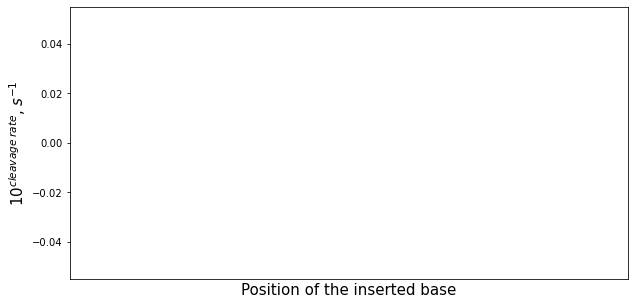

In [22]:
def cut_rate_comp(df, df1, df2, df3, df4, legend='', legend1='Prior Base', legend2='A', legend3='C', legend4='G',
                  legend5='T', save='', name='sgRNA1'):

    # Takes multiple dataframes and compares the cleavage rates between them

    joint_df = cut_rate_table(df, df1, df2, df3, df4)

    # Replace values below -5 with exactly -5
    joint_df[['df1_cleavage_rate_log', 'df2_cleavage_rate_log', 'df3_cleavage_rate_log', 'df4_cleavage_rate_log', 'df_cleavage_rate_log']] = np.maximum(joint_df[['df1_cleavage_rate_log', 'df2_cleavage_rate_log', 'df3_cleavage_rate_log', 'df4_cleavage_rate_log', 'df_cleavage_rate_log']], -5)

    x_data = joint_df.index

    plt.figure(figsize=[10, 5])
    # plt.scatter(x=x_data, y=joint_df.loc[:19, 'df_cleavage_rate_log'], color = 'blue', label=legend1)
    plt.scatter(x=x_data, y=joint_df.loc[:, 'df1_cleavage_rate_log'], s=100, edgecolor='black', alpha=0.5, label=legend2)
    plt.scatter(x=x_data, y=joint_df.loc[:, 'df2_cleavage_rate_log'], s=100, edgecolor='black', alpha=0.5, label=legend3)
    plt.scatter(x=x_data, y=joint_df.loc[:, 'df3_cleavage_rate_log'], s=100, edgecolor='black', alpha=0.5, label=legend4)
    plt.scatter(x=x_data, y=joint_df.loc[:, 'df4_cleavage_rate_log'], s=100, edgecolor='black', alpha=0.5, label=legend5)
    plt.scatter(x=x_data, y=joint_df.loc[:, 'df_cleavage_rate_log'], s=100, color='blue', label=legend1)

    for x in range(1, 5):
        plt.errorbar(x=x_data, y=joint_df.loc[:, f'df{x}_cleavage_rate_log'],
                     yerr=joint_df.loc[:, f'df{x}_cleavage_rate_log_unc'],
                     linestyle='None', color='grey', alpha=0.5)

    plt.errorbar(x=x_data, y=joint_df.loc[:, 'df_cleavage_rate_log'],
                 yerr=joint_df.loc[:, 'df_cleavage_rate_log_unc'],
                 linestyle='None', color='black', alpha=0.5)

    tick_labels = ['{}'.format(len(df)-x) for x in range(0, len(df))]
    plt.xticks(range(0, len(joint_df)), tick_labels)
    plt.ylabel('$10^{cleavage_ rate}$, $s^{-1}$', size=15)
    plt.xlabel('Position of the inserted base', size=15)
    # plt.title('Cleavage rate comparison between sequences with different insertions and sequences with a single duplicated base')

    matched = cleavage[cleavage['sequence'] == pam_cas12 + sequence + pam_cas9].iloc[0, 2]  # cleavage is not defined in the function
    plt.axhline(matched, color='grey', alpha=1, linestyle=':')
    plt.axhline(-5, color='red', alpha=1, linestyle='--')

    plt.xlim(-1.5, len(joint_df))
    plt.ylim(-6, 0)

    if legend == 'outside':
        plt.legend(bbox_to_anchor=(1, 0.75), loc='upper left')
        plt.tight_layout()
    else:
        plt.legend(loc='center left')
        plt.tight_layout()

    plt.text(21, -6.255, '[PAM]')
    plt.text(-1, -4.9, 'Detection limit', color='red')
    plt.text(15, matched + 0.1, 'Matched Target', color='grey')

    if save == 'yes':
        plt.savefig(f"PNG {name} 2 dataframes.png")
        plt.savefig(f'SVG {name} 2 dataframes.svg', format='svg', bbox_inches='tight')

cut_rate_comp(doubles_df, A_df, C_df, G_df, T_df)


# Distance and Rate

## Single insertions

In [23]:
def cut_dis_comp(dna, 
                 rna,
                 df1,
                 df2,
                 df3,
                 df4,
                 strand='DNA',
                 legend='',
                 legend1='DNA',
                 legend1_1='RNA',
                 legend2='A',
                 legend3='C',
                 legend4='G',
                 legend5='T',
                 save='',
                 name='Cas12a'
                ):
    
    joint_df = cut_pos_table(dna, rna, df1, df2, df3, df4)
    
    x_data = joint_df.index
    
    fig, ax1 = plt.subplots(figsize=[10, 5])
    
    ax1.scatter(x=x_data, y=joint_df.loc[:, 'df1_cleavage_rate_log'], s=100, edgecolor='black', label=legend2)
    ax1.scatter(x=x_data, y=joint_df.loc[:, 'df2_cleavage_rate_log'], s=100, edgecolor='black', label=legend3)
    ax1.scatter(x=x_data, y=joint_df.loc[:, 'df3_cleavage_rate_log'], s=100, edgecolor='black', label=legend4)
    ax1.scatter(x=x_data, y=joint_df.loc[:, 'df4_cleavage_rate_log'], s=100, edgecolor='black', label=legend5)
    
    for x in range(1, 5):
        ax1.errorbar(x=x_data, y=joint_df.loc[:, f'df{x}_cleavage_rate_log'],
                     yerr=joint_df.loc[:, f'df{x}_cleavage_rate_log_unc'],
                     linestyle='None', color='grey', alpha=0.5)
    
    ax1.set_xticks(range(len(joint_df)))
    ax1.set_xticklabels(['{}'.format(x+1) for x in range(len(joint_df))])
    ax1.set_xlabel('Position of the inserted base', size=15)
    
    ax1.set_ylabel('$10^{cleavage\_rate}$, $s^{-1}$', size=15)
    
    ax2 = ax1.twinx()
   # if strand == 'DNA':
    #    ax2.scatter(x_data, joint_df['dna_Closest Protein Atom'], s=100, edgecolor='black', marker='s', color='black', label=legend1)
    #elif strand == 'RNA':
    #    ax2.scatter(x_data, joint_df['rna_Distance to Closest Protein Atom'], s=100, edgecolor='black', marker='s', color='black', label=legend1_1)
    #else:
     #   ax2.scatter(x_data, joint_df['dna_Closest Protein Atom'], s=100, edgecolor='black', marker='s', color='black', label=legend1)
      #  ax2.scatter(x_data, joint_df['rna_Distance to Closest Protein Atom'], s=100, edgecolor='black', marker='s', color='black', label=legend1_1)
    
    ax2.set_ylabel('Distance to protein, \u00C5')
    ax2.lines.clear()  # Remove the line plot

    matched = cleavage[cleavage['sequence'] == pam_cas12 + sequence + pam_cas9].iloc[0, 2]
    ax1.axhline(matched, color='grey', alpha=1, linestyle=':')
    ax1.axhline(-5, color='red', alpha=1, linestyle='--')
    
    ax1.set_xlim(-1.5, len(joint_df))
    ax1.set_ylim(-6.5, -0.5)
    
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    
    if strand == 'DNA':
        labels1.append(legend1)
    elif strand == 'RNA':
        labels1.append(legend1_1)
    
    handles1.extend(handles2)
    labels1.extend(labels2)
    
    ax1.legend(handles1, labels1, loc='best')
    
    ax1.text(-1.5, -6.755, '[PAM]')
    ax1.text(17, -4.9, 'Detection limit', color='red')
    ax1.text(0, matched + 0.1, 'Matched Target', color='grey')
    
    if save == 'yes':
        plt.savefig(f"PNG {name} 2 dataframes.png")
        plt.savefig(f'SVG {name} 2 dataframes.svg', format='svg', bbox_inches='tight')

cut_dis_comp(Target, gRNA, A_df, C_df, G_df, T_df, strand = 'DNA')

NameError: name 'Target' is not defined

In [24]:
def mean_dist(   dna, 
                 rna,
                 df1,
                 df2,
                 df3,
                 df4,
                 strand='DNA',
                 legend='',
                 legend1='Distance from DNA to protein',
                 legend1_1='Distance from RNA to protein',
                 legend2='Mean cleavage rate of inserted bases',
                 save='',
                 name='Cas12a mean'
                ):
    
    '''Draws the graph of mean cleavage rates and distances from a nucleotide to the closest atom in a protein '''
    
    joint_df = cut_pos_table(dna, rna, df1, df2, df3, df4)
    
    # Replace values below -5 with exactly -5
    joint_df[['df1_cleavage_rate_log', 'df2_cleavage_rate_log', 'df3_cleavage_rate_log', 'df4_cleavage_rate_log']] = np.maximum(
        joint_df[['df1_cleavage_rate_log', 'df2_cleavage_rate_log', 'df3_cleavage_rate_log', 'df4_cleavage_rate_log']], -5)

    log = '_cleavage_rate_log'
    columns_to_average = ['df1'+log, 'df2'+log, 'df3'+log, 'df4'+log]
    joint_df['Mean'] = joint_df[columns_to_average].mean(axis=1)
    joint_df = joint_df.iloc[:20, :]
    x_data = joint_df.index
    
    fig, ax1 = plt.subplots(figsize=[10, 5])
    
    # Scatter plot
    ax1.scatter(x=x_data, y=joint_df.loc[:, 'Mean'], s=100, color='red', edgecolor='red', alpha = 0.7, label=legend2)
    
    # X-axis and labels
    ax1.set_xticks(range(len(joint_df)))
    ax1.set_xticklabels(['{}'.format(x+1) for x in range(len(joint_df))])
    ax1.set_xlabel('Position of the deleted base', size=15)
    
    # Y-axis on the left
    ax1.set_ylabel('$10^{cleavage\ rate}$, $s^{-1}$', size=15)
    
    ax1.yaxis.label.set_color('red')  # Change the color of the y-axis label to red
    ax1.tick_params(axis='y', colors='black')  # Change the color of the y-axis ticks to red
    
    ax2 = ax1.twinx()  # Create a second y-axis
    if strand == 'DNA':
        ax2.scatter(x_data, joint_df['dna_Closest Protein Atom'], s=100, edgecolor='black', marker='s', alpha = 0.8, color='black', label=f'Distance from {legend1} to protein')
    elif strand == 'RNA':
        ax2.scatter(x_data, joint_df['rna_Distance to Closest Protein Atom'], s=100, edgecolor='black', marker='s', alpha = 0.8, color='black', linewidths=2, label=f'Distance from {legend1_1} to protein')
    else:
        ax2.scatter(x_data, joint_df['dna_Closest Protein Atom'], s=100, edgecolor='black', marker='s', color='black', label=f'Distance from {legend1} to protein')
        ax2.scatter(x_data, joint_df['rna_Distance to Closest Protein Atom'], s=100, edgecolor='black', marker='s', color='black', label=f' Distance from {legend1_1} to protein')
    
    ax2.set_ylabel('Distance, \u00C5', size = 15)

    matched = cleavage[cleavage['sequence'] == pam_cas12 + sequence + pam_cas9].iloc[0, 2]  # Define 'cleavage'
    ax1.axhline(matched, color='red', alpha=1, linestyle=':')
    ax1.axhline(-5, color='red', alpha=1, linestyle='--')
    
    ax1.set_xlim(-1.5, len(joint_df))
    ax1.set_ylim(-5.5, -1)
    
    # Combine all legend labels and handles into a single legend
    handles, labels = ax1.get_legend_handles_labels()
    handles.append(ax2.collections[0])  # Add the scatter plot handle to the legend
    if strand == 'DNA':
        labels.append(legend1)  # Add the 'Distance' label to the legend
    elif strand == 'RNA':
        labels.append(legend1_1)
    else:
        labels.append(legend1)
        labels.append(legend1_1)
    
    ax1.legend(handles, labels, loc='upper left')
    
    ax1.text(-1.5, -5.755, '[PAM]')
    ax1.text(17, -4.9, 'Detection limit', color='red')
    ax1.text(0, matched - 0.2, 'Matched Target', color='red')
    
   # ax1.axvline(x=17, ymin =0.27, ymax=0.68, color='black')
    #ax1.axhline(y=-2.445, xmin=0.84, xmax=0.86, color = 'black')
    #ax1.axhline(y=-4.3, xmin=0.84, xmax=0.86, color = 'black')
    #ax1.text(17.1, -3.45, '*', size = 20)
    
    if save == 'yes':
        plt.savefig(f"PNG {name} 2 dataframes.png")
        plt.savefig(f'SVG {name} 2 dataframes.svg', format='svg', bbox_inches='tight')
    
    listas = []
    for x in range(1, 5):
        truksta = len(joint_df[joint_df[f'df{x}_cleavage_rate_log'] < -5.5])
        listas.append(truksta)
        
    mean = joint_df['Mean'].mean()
    return #joint_df
mean_dist( Target, gRNA, triples_df, triples_df, triples_df, triples_df, strand='DNA')



NameError: name 'Target' is not defined

In [25]:
# Target, gRNA, A_df, C_df, G_df, T_df
# Target, gRNA, del_rate, del_rate, del_rate, del_rate
# Target, gRNA, Amis_df, Cmis_df, Gmis_df, Tmis_df

In [26]:
def mean_dist_scatter(dna, rna, df1, df2, df3, df4, strand='DNA', feature = 'insertion', legend1='Insertion cleavage rate',
                   legend1_1='Deletion cleavage rate', legend1_2 = 'Mismatch cleavage rate', legend2='Deletion cleavage rate',
                   save='', name='Cas12a mean'):
    
    '''Draws the graph of mean cleavage rates and distances from a nucleotide to the closest atom in a protein '''
    
    joint_df = cut_pos_table(dna, rna, df1, df2, df3, df4)
    
    # Replace values below -5 with exactly -5
    joint_df[['df1_cleavage_rate_log', 'df2_cleavage_rate_log', 'df3_cleavage_rate_log', 'df4_cleavage_rate_log']] = np.maximum(
        joint_df[['df1_cleavage_rate_log', 'df2_cleavage_rate_log', 'df3_cleavage_rate_log', 'df4_cleavage_rate_log']], -5)

    log = '_cleavage_rate_log'
    columns_to_average = ['df1'+log, 'df2'+log, 'df3'+log, 'df4'+log]
    joint_df['Mean'] = joint_df[columns_to_average].mean(axis=1, skipna = True)
    joint_df = joint_df.iloc[:20, :]
    x_data = joint_df.index

    if feature == 'insertion':
        legend = legend1
    elif feature == 'deletion':
        legend = legend1_1
    elif feature == 'mismatch':
        legend = legend1_2
    if strand == 'DNA':
        plt.scatter(joint_df.loc[:, 'dna_Closest Protein Atom'], joint_df['Mean'], color='red', label=legend)  # Change bubble color to red
        
    elif strand == 'RNA':
        plt.scatter(joint_df.loc[:, 'rna_Distance to Closest Protein Atom'], joint_df['Mean'], color='red', label=legend)  # Change bubble color to red

    plt.axhline(-1.819393, alpha=1, linestyle=':', color='red')
    plt.text(8, -4.9, 'Detection limit', color='red')
    plt.axhline(-5, alpha=1, linestyle='--', color='red')
    plt.text(8, -1.819393 - 0.4, 'Matched Target', color='red')    
    
    plt.xlim(3, 9.5)
    plt.ylim(-5.5, max(joint_df.loc[:, 'Mean']+0.5))
    plt.xlabel(f'Distance from {strand} to protein, \u00C5', size = 15)
    plt.ylabel('$10^{cleavage\\ rate}$, $s^{-1}$', size = 15)
    plt.legend(loc='lower left', bbox_to_anchor=(0, -0.3))  # Add legend outside of the graph in the lower-left corner
    plt.show()
    
    return joint_df

mean_dist_scatter(Target, gRNA, Amis_df, Cmis_df, Gmis_df, Tmis_df, strand='DNA', feature = 'mismatch')


NameError: name 'Target' is not defined

# Distance and Position

In [27]:
dna = Target.iloc[:20, 1:3]
dna = dna[::-1]
rna = gRNA.iloc[19:39, 1:3]

NameError: name 'Target' is not defined

In [28]:
num_positions = len(dna)

# Create an array of positions (x-axis values)
positions = np.arange(1, num_positions + 1)

# Width of the bars
bar_width = 0.35

# Get the distances for DNA and RNA
distances_dna = dna['Closest Protein Atom']
distances_rna = rna['Distance to Closest Protein Atom']

# Create the grouped bar plot
plt.subplots(figsize=[10, 5])
plt.bar(positions, distances_dna, bar_width, label='DNA')
#plt.plot(positions, distances_dna)
plt.bar(positions + bar_width, distances_rna, bar_width, label='RNA')
#plt.plot(positions + bar_width, distances_rna)

plt.xlabel('Position of a nucleotide', size = 15)
plt.ylabel('Distance, \u00C5', size = 15)
plt.title('Distance from a base in a nucleotide chain to the closest atom in the protein', size = 15)
plt.xticks(positions + bar_width / 2, positions)
plt.legend()
#plt.grid(True)
plt.show()


NameError: name 'dna' is not defined

In [29]:
def start_stop(df, d = 'L'):
    '''Collects the first and final cleavage position of a nuclease in a dataset
    df- the dataset that is being input
    d- direction (L_{time} or R_{time})'''

    # Clearing empty columns
    inserts = df.loc[:, f'{d}_12s':f'{d}_3000m']
    if inserts[f'{d}_3000m'].isna().all():
        inserts = inserts.loc[:, f'{d}_12s':f'{d}_1000m']
    if inserts[f'{d}_12s'].isna().all():
        inserts = inserts.loc[:, f'{d}_3m':f'{d}_1000m']

    filtered_df = pd.DataFrame()

    for index in range(len(inserts)):
        row = inserts.iloc[index, :]
        non_nan_values = row[~pd.isna(row)]  # Get non-NaN values in the row
        if len(non_nan_values) > 0:
            first_non_nan = non_nan_values.iloc[0]  # Get the first non-NaN value
            last_non_nan = non_nan_values.iloc[-1]  # Get the last non-NaN value
            new_row_df = pd.DataFrame({'Start': [first_non_nan], 'End': [last_non_nan]})
            filtered_df = pd.concat([filtered_df, new_row_df], ignore_index=True)
        else:
            # If no non-NaN value found, add a row with NaNs
            new_row_df = pd.DataFrame({'Start': [np.nan], 'End': [np.nan]}, index=[0])  # Specify an index
            filtered_df = pd.concat([filtered_df, new_row_df], ignore_index=True)
            
    #filtered_df = filtered_df.fillna(0)

    filtered_df['Difference'] = filtered_df['Start'] - filtered_df['End']

    return filtered_df


In [30]:
def pos_dist(    dna, 
                 rna,
                 df1,
                 df2,
                 df3,
                 df4,
                 nucleo,
                 strand='DNA',
                 legend='',
                 legend1='Distance from DNA to protein',
                 legend1_1='Distance from RNA to protein',
                 legend2='Start position of trimming',
                 legend21='End position of trimming',
                 save='',
                 name='Cas12a start stop',
                 mean = 'yes'
                ):
    
    '''Draws a graph corelating cleavage position and the distance it gets trimmed to with distances in the structure'''
    
    df_a = start_stop(df1).add_prefix('A_')
    df_c = start_stop(df2).add_prefix('C_')
    df_g = start_stop(df3).add_prefix('G_')
    df_t = start_stop(df4).add_prefix('T_')
    dna = dna.iloc[:20, 1:3]
    dna = dna[::-1]
    rna = rna.iloc[19:39, 1:3]
    dna = dna.reset_index(drop=True).add_prefix('dna_')
    rna = rna.reset_index(drop=True).add_prefix('rna_')
    joint_df = pd.concat([df_a, df_c, df_g, df_t, dna, rna], axis = 1)
    
    start_columns = [col for col in joint_df.columns if col.endswith('_Start')]
    end_columns = [col for col in joint_df.columns if col.endswith('_End')]
    joint_df['Mean_Start'] = joint_df[start_columns].mean(axis=1)
    joint_df['Mean_End'] = joint_df[end_columns].mean(axis=1)
    joint_df['Mean_Difference'] = joint_df['Mean_Start'] - joint_df['Mean_End']
    
    x_data = joint_df.index
    
    fig, ax1 = plt.subplots(figsize=[10, 5])

    # Scatter plot
    if mean == 'yes':
        ax1.scatter(x=x_data, y=joint_df.loc[:, 'Mean_Start'], s=100, marker = 'D', color='red', edgecolor='red', alpha = 0.7, label=f'Mean {legend2}')
        ax1.scatter(x=x_data, y=joint_df.loc[:, 'Mean_End'], s=100, marker = 'D', color='grey', facecolors='none', alpha = 0.7, label=f'Mean {legend21}')
    else:
        ax1.scatter(x=x_data, y=joint_df.loc[:, f'{nucleo}_Start'], s=100, marker = 'D', color='red', edgecolor='red', alpha = 0.7, label=legend2)
        ax1.scatter(x=x_data, y=joint_df.loc[:, f'{nucleo}_End'], s=100, marker = 'D', color='grey', facecolors='none', alpha = 0.7, label=legend21)
    
    ax1.set_xticks(range(len(joint_df)))
    ax1.set_xticklabels(['{}'.format(x+1) for x in range(len(joint_df))])
    ax1.set_xlabel('Position of the deleted base', size=15)
    
    ax2 = ax1.twinx()  # Create a second y-axis
    if strand == 'DNA':
        ax2.scatter(x_data, joint_df['dna_Closest Protein Atom'], s=100, edgecolor='black', marker='s', alpha = 0.5, color='black', linewidths=2, label=f'Distance from {legend1_1} to protein')
    elif strand == 'RNA':
        ax2.scatter(x_data, joint_df['rna_Distance to Closest Protein Atom'], s=100, edgecolor='black', marker='s', alpha = 0.5, color='black', linewidths=2, label=f'Distance from {legend1_1} to protein')
    else:
        ax2.scatter(x_data, joint_df['dna_Closest Protein Atom'], s=100, edgecolor='black', marker='s', color='black', label=f'Distance from {legend1} to protein')
        ax2.scatter(x_data, joint_df['rna_Distance to Closest Protein Atom'], s=100, edgecolor='black', marker='s', color='black', label=f' Distance from {legend1_1} to protein')
    
    ax2.set_ylabel('Distance, \u00C5', size = 15)
    ax1.set_ylabel('Position, relative to PAM', size=15, color = 'red')
    
    # Combine all legend labels and handles into a single legend
    handles, labels = ax1.get_legend_handles_labels()
    handles.append(ax2.collections[0])  # Add the scatter plot handle to the legend
    if strand == 'DNA':
        labels.append(legend1)  # Add the 'Distance' label to the legend
    elif strand == 'RNA':
        labels.append(legend1_1)
    else:
        labels.append(legend1)
        labels.append(legend1_1)
    
    legend = ax1.legend(handles, labels, bbox_to_anchor=(0.3, -0.1))
    ax1.set_xlim(-1.5, len(joint_df))
    ax1.set_ylim(21, 25)
    ax1.text(-1.5, 20.8, '[PAM]')
    
#    ax1.axvline(x=8, ymin =0.23, ymax=0.86, color='black')
 #   ax1.axhline(y=24.45, xmin=0.441, xmax=0.461, color = 'black')
  #  ax1.axhline(y=21.9, xmin=0.441, xmax=0.461, color = 'black')
   # ax1.text(7.3, 23, '*', size = 20)

    listas = []
    start = joint_df[f'Mean_Start'].isna().sum()
    end = joint_df[f'Mean_End'].isna().sum()
    dif = joint_df[f'Mean_Difference'].isna().sum()
    listas.append(start)
    #return listas
    #return joint_df

# Target, gRNA, del_df, del_df, del_df, del_df
# Target, gRNA, A_cleave, C_cleave, G_cleave, T_cleave
# Target, gRNA, Amis_cleave, Cmis_cleave, Gmis_cleave, Tmis_cleave

pos_dist(Target, gRNA, Amis_cleave, Cmis_cleave, Gmis_cleave, Tmis_cleave, nucleo = 'A', strand = 'DNA', mean = 'yes')

NameError: name 'Target' is not defined

In [32]:
def pos_dist_scatter(
                 dna, 
                 rna,
                 df1,
                 df2,
                 df3,
                 df4,
                 #nucleo,  #which of the 4 bases will be drawn, if it is not drawing a mean ({nucleo}_Start, {nucleo}_End)
                 strand='DNA',
                 legend1='Distance from DNA to protein',
                 legend1_1='Distance from RNA to protein',
                 legend2='Start position of trimming',
                 legend21='End position of trimming',
                 save='',
                 name='Cas12a start stop',
                 mean='yes'
                ):
    
    '''Draws a graph correlating cleavage position and the distance it gets trimmed to with distances in the structure'''
    
    df_a = start_stop(df1).add_prefix('A_')
    df_c = start_stop(df2).add_prefix('C_')
    df_g = start_stop(df3).add_prefix('G_')
    df_t = start_stop(df4).add_prefix('T_')
    dna = dna.iloc[:20, 1:3]
    dna = dna[::-1]
    rna = rna.iloc[19:39, 1:3]
    dna = dna.reset_index(drop=True).add_prefix('dna_')
    rna = rna.reset_index(drop=True).add_prefix('rna_')
    joint_df = pd.concat([df_a, df_c, df_g, df_t, dna, rna], axis=1)
    
    start_columns = [col for col in joint_df.columns if col.endswith('_Start')]
    end_columns = [col for col in joint_df.columns if col.endswith('_End')]
    joint_df['Mean_Start'] = joint_df[start_columns].mean(axis=1, skipna=True)
    joint_df['Mean_End'] = joint_df[end_columns].mean(axis=1, skipna=True)
    
    start_positions = joint_df['Mean_Start']
    end_positions = joint_df['Mean_End']
    
    if strand == 'DNA':
        distances = joint_df['dna_Closest Protein Atom']
        
    elif strand == 'RNA':
        distances = joint_df['rna_Distance to Closest Protein Atom']
# Will display the figures
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # Create two subplots horizontally
    
    ax1.scatter(distances, start_positions, label='Start Positions', s=50, marker='D', color='red', edgecolor='red', alpha=0.7)
    ax1.set_xlim(3, 9.5)
    ax1.set_ylim(21, 25)
    ax1.set_xlabel('Distances, \u00C5', size=15)
    ax1.set_ylabel('Position, relative to PAM', size=15, color='red')
    ax1.legend()
    
    ax2.scatter(distances, end_positions, label='End Positions', s=50, marker='D', color='grey', facecolors='none', alpha=0.7)
    ax2.set_xlim(3, 9.5)
    ax2.set_ylim(21, 25)
    ax2.set_xlabel('Distances, \u00C5', size=15)
    ax2.set_ylabel('Position, relative to PAM', size=15, color='red')
    ax2.legend()
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

    return joint_df

pos_dist_scatter(Target, gRNA, del_df, del_df, del_df, del_df, strand='DNA', mean='yes')


NameError: name 'Target' is not defined

# Statistics

### Welch ANOVA

In [34]:
#collect all the data I need
table = cut_rate_table(doubles_df, A_df, C_df, G_df, T_df)

#remove the doubles_df
table_wide = table.loc[:, ['df1_cleavage_rate_log', 'df2_cleavage_rate_log', 'df3_cleavage_rate_log', 'df4_cleavage_rate_log']] 

#only doubles_df
dup_data = pd.DataFrame(table.loc[:, 'df_cleavage_rate_log']) 

#turn both wide dataframes into long formats
long = table_wide.melt(value_name='value').reset_index(drop = True)
long_dup = dup_data.melt(value_name='value').reset_index(drop = True)

#Mark what values need to be removed
values_to_exclude = long_dup['value'].unique()      #Can hide this

# Filter out the rows from the bigger dataframe that match the values in the smaller dataframe
filtered_df = long[~long['value'].isin(values_to_exclude)].reset_index(drop = True)     #Can hide this

#Concat the two dataframes
#concated_df = pd.concat([long, long_dup], ignore_index=True).dropna()
concated_df = pd.concat([filtered_df, long_dup], ignore_index=True).dropna()   #Can hide this

# Create separate data arrays for each category
categories = concated_df['variable'].unique()
data_arrays = [concated_df[concated_df['variable'] == cat]['value'].values for cat in categories]

# Perform Welch ANOVA
f_statistic, p_value = stats.f_oneway(*data_arrays)

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

TypeError: at least two inputs are required; got 0.

In [35]:
#Doubles and Triples dfs comparison

double_df = doubles_df.reset_index(drop=True)
triple_df= triples_df.reset_index(drop=True)
j_df = double_df.add_prefix('df_')
j_df1 = triple_df.add_prefix('df1_')
table_wide = pd.concat([j_df, j_df1], axis = 1)
table_wide = table_wide.loc[:, ['df_cleavage_rate_log', 'df1_cleavage_rate_log']]
table_long = table_wide.melt(value_name='value').dropna()

# Create separate data arrays for each category
categories = table_long['variable'].unique()
data_arrays = [table_long[table_long['variable'] == cat]['value'].values for cat in categories]

# Perform Welch ANOVA
f_statistic, p_value = stats.f_oneway(*data_arrays)

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

TypeError: at least two inputs are required; got 0.

### Mann-Whitney-Wilcoxon criteria

In [36]:
    joint_df = cut_pos_table(Target, gRNA, A_df, C_df, G_df, T_df)
    
    log = '_cleavage_rate_log'
    columns_to_average = ['df1'+log, 'df2'+log, 'df3'+log, 'df4'+log]
    joint_df['Mean'] = joint_df[columns_to_average].mean(axis=1)

statistic, p_value = stats.mannwhitneyu(joint_df.loc[:, 'Mean'], joint_df.loc[:, 'rna_Distance to Closest Protein Atom'])

# Print the test statistic and p-value
print("Mann-Whitney U Statistic:", statistic)
print("P-Value:", p_value)

NameError: name 'Target' is not defined

### Spearman

In [37]:
def calc_Spearman(Target, gRNA, data_type, distance, *cleavage_data, **kwargs):
    
    #I specify which part of the distances data is relevant 
    target = Target.iloc[:20, 1:3][::-1].reset_index()
    grna = gRNA.iloc[19:39, 1:3]
   
    dfs = {}   # dictionary to temporarily store the DataFrames
    results = []  # List to store correlation results
    
    #I label the cleavage data in a dictionary and label them as dfi
    for i, df in enumerate(cleavage_data, start=1):
        dfs[f"df{i}"] = df

    results_df = pd.DataFrame()
    
    #Specify the distances file
    x = target.loc[:, 'Closest Protein Atom'] if distance == 'DNA' else grna.loc[:, 'Distance to Closest Protein Atom']
        
    # Correlates each base insertion as well as mean values
    if data_type == 'cleavage rate':
        for frame_name, frame_data in dfs.items(): #separates the labels of dfs (df1, df2) from the data itself 
            y = np.maximum(pd.DataFrame(frame_data).loc[:, 'cleavage_rate_log'], -5) #i specify which column contains my data and I make it so that 
            #the data does not go below -5            
            corr_coefficient, p_value = stats.spearmanr(x, y)
            results.append({'Dataframe': frame_name, 'Correlation Coefficient': corr_coefficient, 'p-value': p_value})
    
        # Calculate the average cleavage rate
        average_cleavage_rate = pd.concat([pd.DataFrame(frame_data).reset_index(drop=True).loc[:, 'cleavage_rate_log'] for frame_data in dfs.values()], axis=1).mean(axis=1) 
        average_cleavage_rate = np.maximum(average_cleavage_rate, -5)
        corr_coefficient_mean, p_value_mean = stats.spearmanr(x, average_cleavage_rate)
        results.append({'Dataframe': 'Means', 'Correlation Coefficient': corr_coefficient_mean, 'p-value': p_value_mean})
        results_df = pd.DataFrame(results)
        
    # Gather the initial cleavage positions and the amount of trimming
    elif data_type == 'cleavage position':
        #Concats all of the input dataframes together, after finding the start and end positions
        base_dataframes = [start_stop(pd.DataFrame(df)).add_prefix(f'{base}_') for base, df in dfs.items()]
        results_df = pd.DataFrame({'Dataframe': list(dfs.keys()) + ['Mean']})
    
        #<!----!>
        #this part is intended for the average value calculations
        
        all_df = pd.concat(base_dataframes, axis=1)
        
        # Calculate mean values for start, end, and difference
        start_columns = [col for col in all_df.columns if col.endswith('_Start')] 
        end_columns = [col for col in all_df.columns if col.endswith('_End')]
        all_df['Mean_Start'] = all_df[start_columns].mean(axis=1)
        all_df['Mean_End'] = all_df[end_columns].mean(axis=1)
        all_df['Mean_Difference'] = all_df['Mean_Start'] - all_df['Mean_End']
        mean_df = pd.concat([all_df.loc[:, 'Mean_Start':'Mean_Difference'].reset_index(drop =True), x.reset_index(drop=True)], axis = 1)
        #<!----!>
               
        
        
        for position in ('Start', 'End', 'Difference'):
            correlations = []
            p_values = []
                
            for i, _ in enumerate(base_dataframes):
                spread = pd.DataFrame(base_dataframes[i].loc[:, f'df{i+1}_{position}'])
                temp = pd.concat([spread.iloc[:, 0].reset_index(drop = True), x.reset_index(drop=True)], axis = 1).dropna()
                corr_coefficient, p_value = stats.spearmanr(temp.iloc[:, 0], temp.iloc[:, 1])
                correlations.append(corr_coefficient)
                p_values.append(p_value)
            
            mean_temp = pd.concat([mean_df.loc[:, f'Mean_{position}'], mean_df.iloc[:, -1]], axis = 1).dropna()
            corr_coefficient, p_value = stats.spearmanr(mean_temp.iloc[:, 0], mean_temp.iloc[:, 1])
            correlations.append(corr_coefficient)
            p_values.append(p_value)
            results_df[f'{position}_Correlation'] = correlations
            results_df[f'{position}_p-value'] = p_values
                
    elif data_type == 'PAM pos':
        for frame_name, frame_data in dfs.items():
            pams = pd.DataFrame(frame_data)
            y = pams.loc[:, 'PAM relative position']
            corr_coefficient, p_value = stats.spearmanr(x, y)
            results.append({'Dataframe': frame_name, 'Correlation Coefficient': corr_coefficient, 'p-value': p_value})
        
        results_df = pd.DataFrame(results)
        
    return results_df

calc_Spearman(Target, gRNA, 'cleavage position', 'DNA', del_df)


NameError: name 'Target' is not defined

In [ ]:
# Target, gRNA, del_rate                                  #Deletion cleavage rate
# Target, gRNA, A_df, C_df, G_df, T_df                    #Insertion cleavage rate
# Target, gRNA, A_cleave, C_cleave, G_cleave, T_cleave    #Insertion change of position 
# Target, gRNA, del_df                                    #deletion change of position
# Amis_cleave, Cmis_cleave, Gmis_cleave, Tmis_cleave      #mismatch change of position
# Amis_df, Cmis_df, Gmis_df, Tmis_df                      #mismatch cleavage rate
# gRNA.dropna().iloc[:20, :]                              #Distance from nucleic acid chains and position from PAM corr
# triples_df                                              # Dual same identity insertions